# Intrusion Detection On NSL KDD Multiclass Classification
## Contents 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

KDDTrain_dataset_path   = "PKDDTrain+.csv"
KDDTrain20_dataset_path = "PKDDTrain+_20Percent.csv"
KDDTest_dataset_path    = "PKDDTest+.csv"
KDDTest20_dataset_path  = "PKDDTest-21.csv"

## Data Preprocessing
### Loading the NSLKDD dataset

In [2]:
def load_data(data_path):
    data = pd.read_csv(data_path)
    return data

KDDTrain   =  load_data(KDDTrain_dataset_path)
KDDTrain20 =  load_data(KDDTrain20_dataset_path)
KDDTest    =  load_data(KDDTest_dataset_path)
KDDTest20  =  load_data(KDDTest20_dataset_path)

In [3]:
attack_dict = {
     'normal': 0,
     'DoS'   : 1, 
     'Probe' : 2,
     'R2L'   : 3,   
     'U2R'   : 4,
}
_col = KDDTrain['labels5'].map(attack_dict)


### Normalizing the data

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from keras.utils.np_utils import to_categorical

attack_dict = {
     'normal': 0,
     'DoS'   : 1, 
     'Probe' : 2,
     'R2L'   : 3,   
     'U2R'   : 4,
}

class SplitData(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        super(SplitData, self).__init__()
    
    def fit(self,X,y=None):
        return self 
    
    def transform(self, X, labels, y=None):
        
        # Preparing the labels
        y = X[labels]
        X.drop('labels5',axis=1,inplace=True)
        X.drop('labels2',axis=1,inplace=True)
        
        if (labels == 'labels2'):
            y = (y == 'normal')
            y_ = np.asarray(y).astype('float32')
        else:
            mapping_col   = y.map(attack_dict)
            #y_ = to_categorical(mapping_col)
            y_ = mapping_col.values
            
        # Scalling
        # scaler = StandardScaler().fit(X)
        # X_ = scaler.transform(X)
        
        # Normalization 
        normalize = MinMaxScaler().fit(X)
        X_ = normalize.transform(X)
        return X_,y_

/home/labed/ml/env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
X_train, y_train = SplitData().transform(KDDTrain, labels='labels5')
X_train20, y_train20 = SplitData().transform(KDDTrain20, labels='labels5')
X_test, y_test = SplitData().transform(KDDTest, labels='labels5')
X_test20, y_test20 = SplitData().transform(KDDTest20, labels='labels5')

### Data Description

In [6]:
def description(data):
    print("Number of samples(examples) ",data.shape[0]," Number of features",data.shape[1])
    print("Dimension of data set ",data.shape)
print("#Features ")    
for data in [X_train,X_train20,X_test,X_test20]:
    description(data)
    print('---------------------------------------------------------------')
print("#Labels")    
for data in [y_train,y_train20,y_test,y_test20]:
    print("Dimension of data set ",data.shape)
    print('---------------------------------------------------------------')

#Features 
Number of samples(examples)  125973  Number of features 121
Dimension of data set  (125973, 121)
---------------------------------------------------------------
Number of samples(examples)  25192  Number of features 121
Dimension of data set  (25192, 121)
---------------------------------------------------------------
Number of samples(examples)  22544  Number of features 121
Dimension of data set  (22544, 121)
---------------------------------------------------------------
Number of samples(examples)  11850  Number of features 121
Dimension of data set  (11850, 121)
---------------------------------------------------------------
#Labels
Dimension of data set  (125973,)
---------------------------------------------------------------
Dimension of data set  (25192,)
---------------------------------------------------------------
Dimension of data set  (22544,)
---------------------------------------------------------------
Dimension of data set  (11850,)
----------------------

In [7]:
print("maximum element:",np.max(X_train))
print("minimum element:",np.min(X_train))

maximum element: 1.0
minimum element: 0.0


## Building the network
### The network architecture

In [8]:
from keras import layers,optimizers,metrics,models

In [9]:
model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', input_shape=(121,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

### The compilation step

In [10]:
#optimizers.RMSprop(lr=0.001) rmsprop
model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=20, batch_size=256)

Train on 84401 samples, validate on 41572 samples
Epoch 1/20
84401/84401 [==============================] - 66s 787us/step - loss: 0.1508 - acc: 0.9594 - val_loss: 0.0565 - val_acc: 0.9805
Epoch 2/20
84401/84401 [==============================] - 64s 760us/step - loss: 0.0576 - acc: 0.9805 - val_loss: 0.0422 - val_acc: 0.9855
Epoch 3/20
84401/84401 [==============================] - 61s 723us/step - loss: 0.0468 - acc: 0.9845 - val_loss: 0.0358 - val_acc: 0.9880
Epoch 4/20
84401/84401 [==============================] - 61s 722us/step - loss: 0.0408 - acc: 0.9863 - val_loss: 0.0325 - val_acc: 0.9897
Epoch 5/20
84401/84401 [==============================] - 62s 731us/step - loss: 0.0370 - acc: 0.9874 - val_loss: 0.0298 - val_acc: 0.9910
Epoch 6/20
84401/84401 [==============================] - 61s 726us/step - loss: 0.0332 - acc: 0.9885 - val_loss: 0.0272 - val_acc: 0.9913
Epoch 7/20
84401/84401 [==============================] - 61s 720us/step - loss: 0.0312 - acc: 0.9895 - val_loss: 0.

 ## Ploating

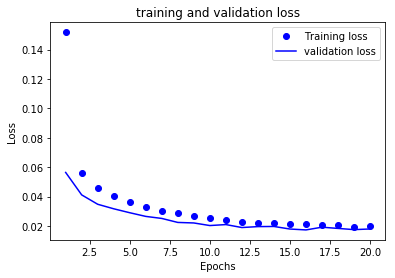

In [177]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['val_acc']

epochs = range(1,len(acc) +1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='validation loss')

plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


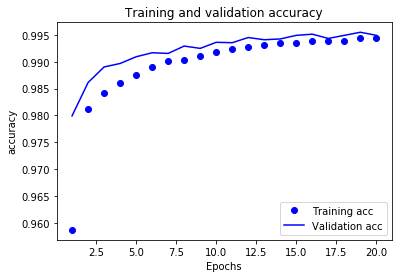

In [178]:
plt.show()


plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Evaluation 

In [179]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

y_test_pred = model.predict_classes(X_test)

In [180]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2','3','4']

def score_detail(y_test,y_test_pred):
    # Confusion matrix
    print("Confusion matrix")
    print(confusion_matrix(y_test, y_test_pred))
    # Accuracy 
    #print('Accuracy ',accuracy_score(y_test, y_test_pred, average='micro'))
    # Precision 
    print('Precision ',precision_score(y_test, y_test_pred, average='micro'))
    # Recall
    print('Recall ',recall_score(y_test, y_test_pred, average='micro'))
    # F1 score
    print('F1 score ',f1_score(y_test,y_test_pred, average='micro'))

score_detail(y_test,y_test_pred)

Confusion matrix
[[9427   65  217    0    2]
 [1114 6314   30    0    0]
 [ 510  214 1684   13    0]
 [2453    1    6  291    3]
 [ 175    0    4    4   17]]
Precision  0.7865951029098651
Recall  0.7865951029098651
F1 score  0.7865951029098651


In [181]:
model.evaluate(X_test,y_test)

22544/22544 [==============================] - 9s 413us/step


[2.1211482918880105, 0.7865951029098651]

In [182]:
print(classification_report(y_test, y_test_pred, target_names=target_names))

             precision    recall  f1-score   support

          0       0.69      0.97      0.81      9711
          1       0.96      0.85      0.90      7458
          2       0.87      0.70      0.77      2421
          3       0.94      0.11      0.19      2754
          4       0.77      0.09      0.15       200

avg / total       0.83      0.79      0.75     22544



In [183]:
y_test_pred20 = model.predict_classes(X_test20)
score_detail(y_test20,y_test_pred20)

Confusion matrix
[[1874   63  213    0    2]
 [1113 3199   30    0    0]
 [ 510  214 1665   13    0]
 [2447    1    6  297    3]
 [ 175    0    4    4   17]]
Precision  0.5951054852320675
Recall  0.5951054852320675
F1 score  0.5951054852320675


In [185]:
print(classification_report(y_test20, y_test_pred20, target_names=target_names))

             precision    recall  f1-score   support

          0       0.31      0.87      0.45      2152
          1       0.92      0.74      0.82      4342
          2       0.87      0.69      0.77      2402
          3       0.95      0.11      0.19      2754
          4       0.77      0.09      0.15       200

avg / total       0.80      0.60      0.59     11850



## Saving the model 

In [184]:
from keras.models import load_model

model.save('MC_MODEL.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
#model = load_model('my_model.h5')